<a href="https://colab.research.google.com/github/SnehalMalhotra/PROJECT-1/blob/master/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALLING KAGGLE

In [1]:
!pip install kaggle

UPLOADING KAGGLE.JSON FILE

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snehalmalhotra","key":"2162662b2f4925f79c18aa6b2e318aef"}'}

SETTING UP ENVIRONMENT VARIABLES

In [3]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

DOWNLOADING DATASET FROM KAGGLE

In [4]:
!kaggle datasets download -d snehalmalhotra/project-1-food

 99% 1.70G/1.71G [00:12<00:00, 163MB/s]
100% 1.71G/1.71G [00:12<00:00, 145MB/s]


UNZIPPING ALL FILES

In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/seaweed_salad/1344888.jpg  
  inflating: images/seaweed_salad/1353044.jpg  
  inflating: images/seaweed_salad/1356723.jpg  
  inflating: images/seaweed_salad/135986.jpg  
  inflating: images/seaweed_salad/1362289.jpg  
  inflating: images/seaweed_salad/1368944.jpg  
  inflating: images/seaweed_salad/1373406.jpg  
  inflating: images/seaweed_salad/1374245.jpg  
  inflating: images/seaweed_salad/1375859.jpg  
  inflating: images/seaweed_salad/1377242.jpg  
  inflating: images/seaweed_salad/1377412.jpg  
  inflating: images/seaweed_salad/1377676.jpg  
  inflating: images/seaweed_salad/1380296.jpg  
  inflating: images/seaweed_salad/1384500.jpg  
  inflating: images/seaweed_salad/1387272.jpg  
  inflating: images/seaweed_salad/1388596.jpg  
  inflating: images/seaweed_salad/1397174.jpg  
  inflating: images/seaweed_salad/1402866.jpg  
  inflating: images/seaweed_salad/1403794.jpg  
  inflating: images/seaweed_salad/1407

IMPORTING REQUIRED LIBRARIES

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)

DEFINING BATCH SIZE

In [7]:
bs=64

CREATING DATA BUNCH



In [8]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("images"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

ANALYSING SOME RESULTS

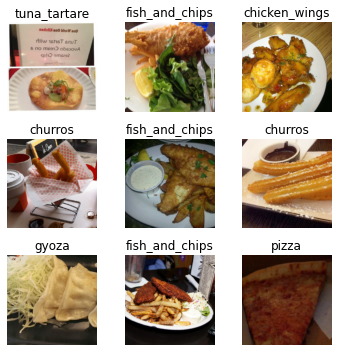

In [9]:
data.show_batch(rows=3, figsize=(5,5))

CHECKING ALL CLASSES AND HOW MANY CATEGORIES ARE PRESENT IN MY DATASET

In [10]:
print(data.classes)
len(data.classes)

['breakfast_burrito', 'caprese_salad', 'carrot_cake', 'cheesecake', 'chicken_quesadilla', 'chicken_wings', 'chocolate_mousse', 'churros', 'club_sandwich', 'crab_cakes', 'falafel', 'fish_and_chips', 'foie_gras', 'gyoza', 'hummus', 'macaroni_and_cheese', 'pizza', 'poutine', 'seaweed_salad', 'spaghetti_bolognese', 'tuna_tartare']


21

GENERATING MODEL FOR TRAINING

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


TRAINING OUR MODEL

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.381058,0.919238,0.725000,07:51
1,0.952385,0.713530,0.782381,07:31
2,0.743774,0.617028,0.813810,07:21
3,0.586420,0.583449,0.826429,07:23


MOUNTING GOOGLE DRIVE

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


MAKING A DIRECTORY IN GOOGLE DRIVE

In [14]:
os.mkdir("/content/drive/My Drive/GeeksMan_AISquad_Project1_SNEHAL")

In [25]:
folder_name="/content/drive/My Drive/GeeksMan_AISquad_Project1_SNEHAL"

UNFREEZING ALL LAYERS

In [16]:
learn.unfreeze()

In [17]:
# learn.load("/content/drive/My Drive/GeeksMan_AISquad_Project1_SNEHAL/Stage-1")

FileNotFoundError: ignored

FINDING LEARNING RATE





In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


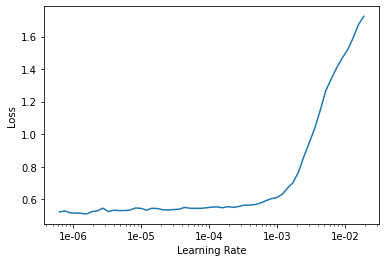

In [19]:
learn.recorder.plot()

TRAINING DATASET ON ALL LAYERS

In [20]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.540151,0.563571,0.833809,07:58
1,0.470247,0.527334,0.846429,07:55
2,0.417701,0.510094,0.849524,07:58
3,0.378381,0.509156,0.850952,08:00


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.372539,0.492430,0.853095,08:00
1,0.340941,0.485476,0.854762,08:02


In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.326179,0.479995,0.855714,08:07
1,0.299553,0.474658,0.860952,08:09
2,0.254236,0.474360,0.860000,08:21


In [26]:
learn.save(folder_name+"/Stage-1")

In [27]:
learn.export(folder_name+"/export.pkl")

ANALYSING RESULTS

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

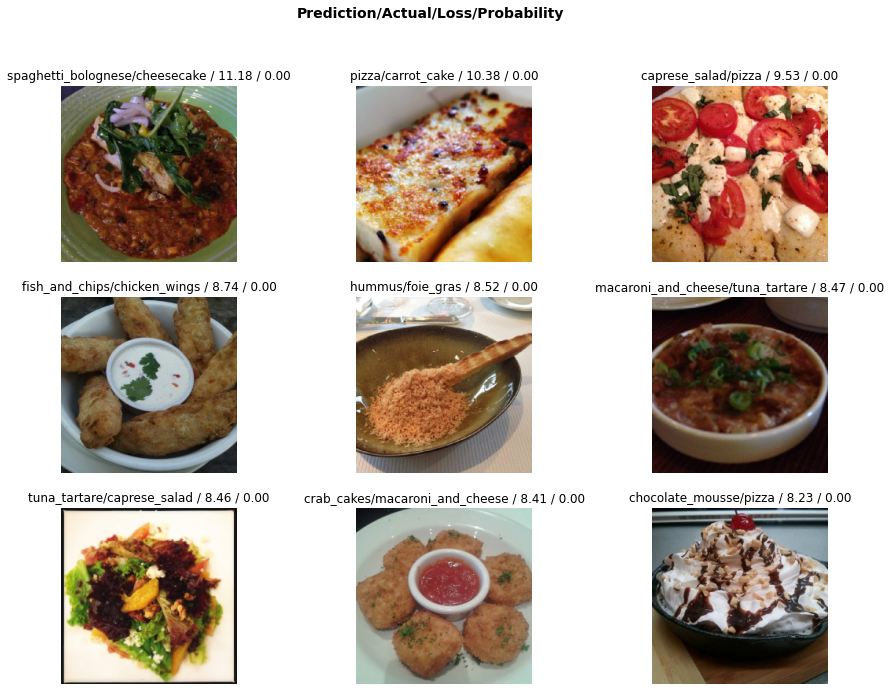

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

PLOTTING CONFUSION MATRIX FOR BETTER VISUALISATION OF RESULTS 

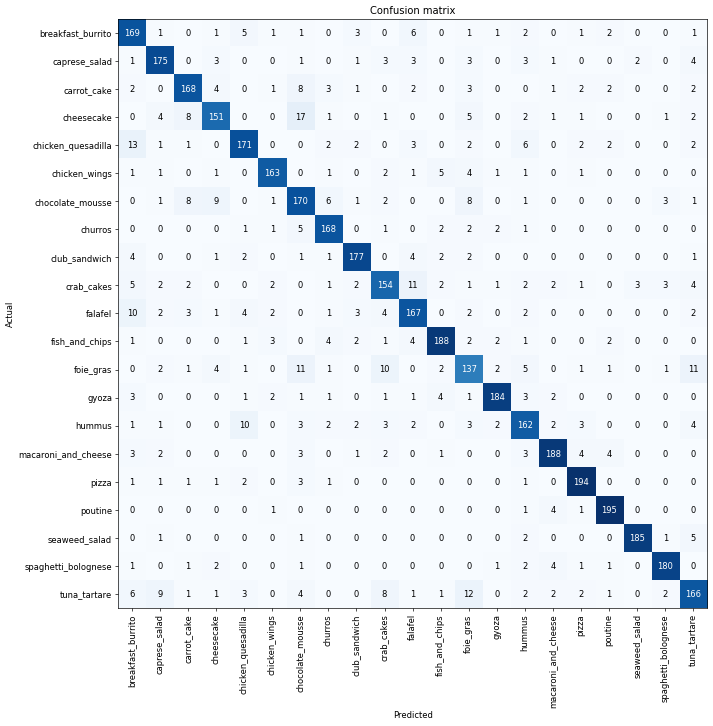

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)